## Data Storytelling

The purpose of this assignment is to take *any* data set, and craft an executive presentation.  Prior to crafting the presentation I need to explore the data and decide on a narrative.  I'll aim to answer these questions:

1 - What is the overall trend in animal bites as time moves forward? More or less rabid?  More or less frequent?

2 - What are the anomolies to this trend, the exceptions that make the rule?

3 - What correlations are there in the data?  What inferences can be made from these correlations?

4 - Are assumptions about breed-specific behavior (Pit Bulls & Chihuahuas being more agressive) supported by the data?

5 - Is there a hypothesis that I can test here, or that would be valuable to test as follow up?

#### BLUF:

1 - There are no true trends year over year, there is only adequate data provided for 6 years.  However there is an annual trend of increased animal bites in the summer.

2 - Cats break the annual trend in increased bites in summer, and bite people almost as frequently in the winter as they do in the summer.  Additionally there was an increase in animal bites overall in 2015-2016; with an increase in bites for all breeds, but particularly with German Shepherds. 

3 - Interestingly there are several zip codes that have a significantly higher frequency of animal bites than others, largely driven by an increase of pit bull bites. This would seem to indicate that there are significant environmental factors that impact whether or not a dog will bite, potentially including a larger number of pit bulls or dogs in general. 

4 - Pit Bulls, German Shepherds, Labrador Retrievers, and in some years Chihuahua's are the breeds that bit people the most.  It cannot be inferred that these breeds are most likely to bite without information on the total number of breeds in Louisville, but it can be inferred that if a dog has bitten someone that it is most likely one of these breeds.  However this data does ***loosely*** support the banning of Pit Bulls and other 'agressive breeds' by airlines and some housing companies. 

5 - The biggest follow up recommendation here is to standardize both rabies testing practices, as well as data recording practices.  I have 'meh' data for 6 years, and almost no data until 2011 and no data after 2018.  

I also hypothesize that the breeds who are most likely to bite (bites by breed / number of dogs in that breed) will **not** be exactly the same as the dogs who bite the most overall.  Labs and Pit Bulls are some of the most popular dog breeds in the US, and also bit people the most.  

Finally, I hypothesize that if dog training classes are made more readily available in the 5 zip codes where animal bites are more frequent, then over time the requency of dog bites will go down. 

Column descriptions are copy/pasted from [this](https://www.kaggle.com/rtatman/animal-bites) Kaggle data set below:

Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

bite_date: The date the bite occurred

SpeciesIDDesc: The species of animal that did the biting

BreedIDDesc: Breed (if known)

GenderIDDesc: Gender (of the animal)

color: color of the animal

vaccination_yrs: how many years had passed since the last vaccination

vaccination_date: the date of the last vaccination

victim_zip: the zipcode of the victim

AdvIssuedYNDesc: whether advice was issued

WhereBittenIDDesc: Where on the body the victim was bitten

quarantine_date: whether the animal was quarantined

DispositionIDDesc: whether the animal was released from quarantine

headsentdate: the date the animal’s head was sent to the lab

release_date: the date the animal was released

ResultsIDDesc: results from lab tests (for rabies)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
bites = pd.read_csv('Animal Bites/Health_AnimalBites.csv')

# Data Cleaning

Prior to exploratory analysis I need to clean up this data set and make sure that it's going to be easily usable, there are some columns that seem abiguous, and I'll need to decide what to do with specific columns depending on % of values missing or if they need to be transformed for analysis in pandas.

In [3]:
bites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 562.8+ KB


In [4]:
bites = bites[bites['bite_date'].notna()]

In [5]:
bites['SpeciesIDDesc'].value_counts()

DOG        6932
CAT        1535
BAT          76
RACCOON      21
OTHER         8
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

In [6]:
bites['SpeciesIDDesc'].fillna('NONE', inplace=True)
bites['SpeciesIDDesc'].replace(to_replace = ['HORSE', 'FERRET', 'RABBIT', 'SKUNK', 'BAT', 'RACCOON', 'NONE'], value='OTHER', 
                               inplace=True)
bites['SpeciesIDDesc'].value_counts()

DOG      6932
CAT      1535
OTHER     219
Name: SpeciesIDDesc, dtype: int64

In [7]:
breed_count = bites.BreedIDDesc.value_counts()
breed_count = breed_count[breed_count<50]
drop_list = list(breed_count.index)
bites['BreedIDDesc'].replace(to_replace=drop_list, value='OTHER', inplace=True)
bites['BreedIDDesc'].fillna('NONE', inplace=True)
bites.BreedIDDesc.value_counts()

NONE               4981
OTHER              1188
PIT BULL           1082
GERM SHEPHERD       324
LABRADOR RETRIV     248
BOXER               181
CHICHAUHUA          164
BEAGLE              115
SHIH TZU            115
ROTTWEILER           86
AAUST. TERR.         77
DACHSHUND            67
GOLD RETRIEVER       58
Name: BreedIDDesc, dtype: int64

While 50 bite incidents was a realtively arbitrary cutoff; it does seem appropriate that any breed in the 'OTHER' category bites less frequently than a Golden Retriever which is a good frame of reference for an executive audience.  Everyone knows Golden Retrievers and their reputation for sunny dispositions.

This data set also presents some challenges, main that it's mostly empty.  Only 5 of the 15 columns have data for more than half of the entries.  Additionally the meaning of some columns is highly ambiguous and will likely be dropped:

AdvIssuedYNDesc: What advice would be issued? Further medical attention? Examination of the dog? 

vaccination_yrs/vaccination_date:  Vaccination of the victim or animal?  Is this specific to rabies?

Many of the other columns are only relevant if there is a significant number of rabies cases in this data set, or even significant number of non-null entries that indicate the presence of rabies or not. 

In [8]:
bites.ResultsIDDesc.value_counts()
# creating a second dataframe containing definitive results for rabies tests for later use
rabies = bites[(bites.ResultsIDDesc == 'NEGATIVE') | (bites.ResultsIDDesc == 'POSITIVE')]

Out of over 9000 entries we have only 134, or roughly 1% of the values with a **known** disposition regarding rabies.  Without more information on rabies presence in animal bites most of the other columns are note useful.  For the purposes of this excercise I will only focus on animal bites, the breeds that bite, species, as well as victim information.  All veterinary tests or information related to rabies is fairly useless unless we know if there were results from rabies tests. 

In [9]:
bites = bites.drop(['vaccination_yrs', 'vaccination_date', 'AdvIssuedYNDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'], axis=1)
bites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8686 entries, 0 to 9002
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bite_date          8686 non-null   object
 1   SpeciesIDDesc      8686 non-null   object
 2   BreedIDDesc        8686 non-null   object
 3   GenderIDDesc       6409 non-null   object
 4   color              6351 non-null   object
 5   victim_zip         6897 non-null   object
 6   WhereBittenIDDesc  8358 non-null   object
dtypes: object(7)
memory usage: 305.4+ KB


After dropping all the columns related to rabies our data set is much less sparse and ready for some analysis.  I'm going to fill the missing values and covert the bite_date to new columns that are datetime objects.

In [10]:
bites.fillna('NONE', inplace=True)
bites['bite_date'] = np.where(bites['bite_date'] == '5013-07-15 00:00:00', '2013-07-15 00:00:00', bites['bite_date'])
bites.sort_values(by='bite_date')
#These bite dates were set to 5001 rather than 2001 and causing an error when trying to convert to datetime
bites.loc[1512, 'bite_date'] = '2001-02-18'
bites.loc[5055, 'bite_date'] = '2001-01-21'
bites.loc[1512, 'bite_date'] = '2001-02-21'
bites.loc[1512, 'bite_date'] = '2001-05-01'
bites.loc[6293, 'bite_date'] = '2001-02-21'
bites.loc[6505, 'bite_date'] = '2001-05-01'
bites['bite_date'] = pd.to_datetime(bites['bite_date'])

In [11]:
bites['bite_year'] = bites['bite_date'].dt.year
bites['bite_month'] = bites['bite_date'].dt.month
bites['bite_day'] = bites['bite_date'].dt.day
#Dropping bites after 2017 - there are only two bites from 2018-2021
bites=bites[bites.bite_year <= 2017]
bites = bites.sort_values(by='bite_date')

## Data Exploration

Here is where I'll begin to explore some of the questions I outlined above.  I've included them here for reference:

1 - What is the overall trend in animal bites as time moves forward? More or less rabid?  More or less frequent?

2 - What are the anomolies to this trend, the exceptions that make the rule?

3 - What correlations are there in the data?  What inferences can be made from these correlations?

4 - Are assumptions about breed-specific behavior (Pit Bulls & Chihuahuas being more agressive) supported by the data?

5 - Is there a hypothesis that I can test here, or that would be valuable to test as follow up?

At this point any trends regarding rabid animal bites are moot.  I have one instance of rabies in the entire data set and that's just not enough to draw conclusions from.  However I could later examine that data to see if *reporting* trends around rabies and medical treatment of bites aligns with some other trends I may find in the data.

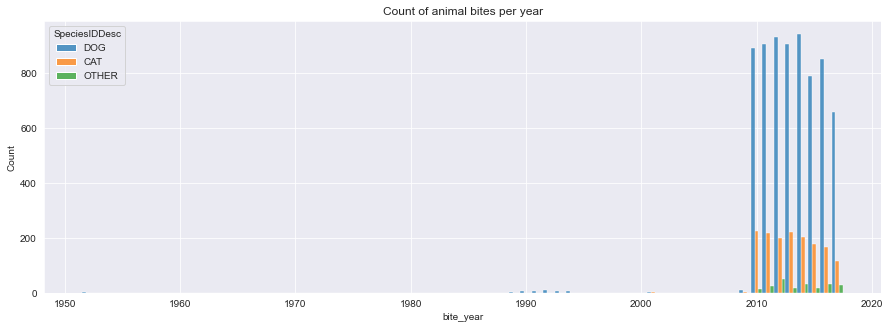

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(data=bites, x='bite_year', stat='count', multiple='dodge', hue='SpeciesIDDesc', 
             discrete=True)
plt.title('Count of animal bites per year')
plt.show()

Based on this histogram it appears that most animal bites occured after 2009 in the Louisville metro area.  It may be worth looking into whether or not new reporting practices were enacted then and if a policy change caused the sustained increase in reported bites.  I'm going to examine these as two separate time periods and see if that provides a clearer picture as to how animal bites were reported in what is clearly two distinct time periods.

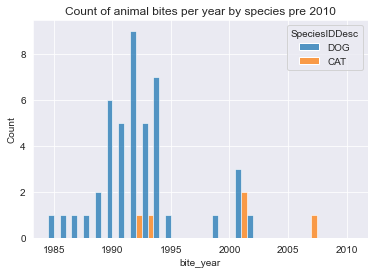

In [13]:
sns.histplot(data=bites[bites.bite_year <= 2008], x='bite_year', stat='count', binrange=(1985, 2010), hue='SpeciesIDDesc', 
             multiple='dodge', discrete=True)
plt.title('Count of animal bites per year by species pre 2010')
plt.show();

While there is data on animal bites that were reported in Louisville from 1985-2010, there are 100 times more bites reported beginning in 2010.  Statistically it is HIGHLY unlikely that this is due to a 100x increase in animal bite incidents in 2011.  Here I would consult with relevant data management for the city of Louisville to see if reporting practices changed in 2011, either moving from paper to digital records or simply a new initiative to record all animal bites. 

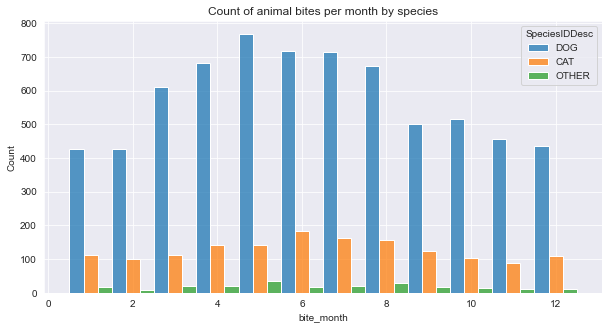

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=bites, x='bite_month', stat='count', hue='SpeciesIDDesc', multiple='dodge', discrete=True)
plt.title('Count of animal bites per month by species');

The results from looking at animal bite occurances in each month is more intuitive than the year over year reporting.  In summer months when people are outside there are more animal bites than in the winter with a peak in May. 

Note than while ALL animal species follow the trend for increased bite activity in the summer, the peak for cats follows a bit later in June than the peak for dogs, and it is also less pronounced.  

Additionally, the behavior for 'other' species which includes Bats and Raccoons, has two minor peaks in May and August.  This would be something that is worth consulting a relevant animal behavior expert on.  Peaks in bite activity for non-domestic animals seems to mirror seasonal changes in the weather for the Louisville area, and could be a result of changing animal behavior during those times. 

The function below was found [here](https://github.com/mwaskom/seaborn/issues/2280) as a workaround to more easily move and edit seaborn legends

In [15]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

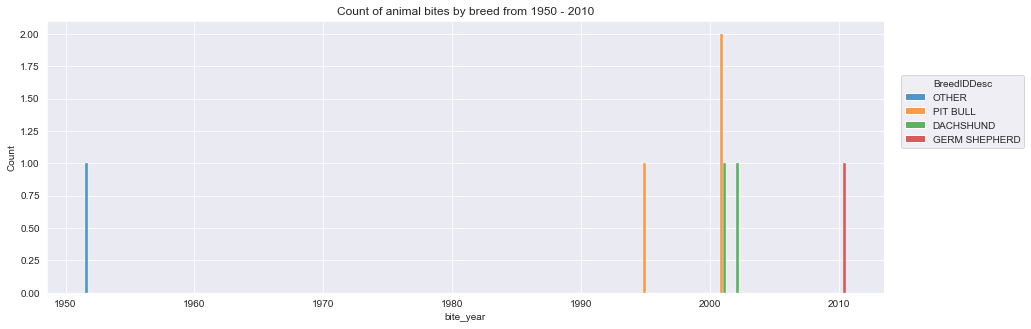

In [16]:
plt.figure(figsize=(15,5))
g = sns.histplot(data=bites[(bites.bite_year <= 2010) & (bites.BreedIDDesc != 'NONE')], x='bite_year', 
             stat='count', hue='BreedIDDesc', multiple='dodge', discrete=True)
plt.title('Count of animal bites by breed from 1950 - 2010')
move_legend(g, new_loc='upper left', bbox_to_anchor=(1.02, 0.8), borderaxespad=0);

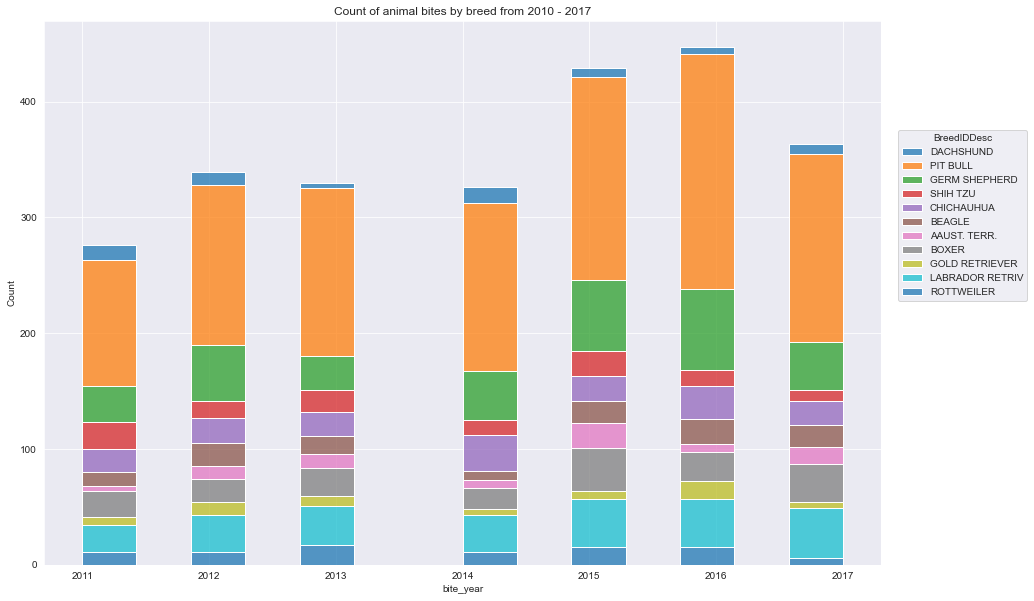

In [17]:
plt.figure(figsize=(15,10))
g=sns.histplot(data=bites[(bites.bite_year>=2011)&(bites.BreedIDDesc!='NONE')&(bites.BreedIDDesc!='OTHER')], 
             x='bite_year', stat='count', hue='BreedIDDesc', multiple='stack', palette='tab10')
plt.title('Count of animal bites by breed from 2010 - 2017')
move_legend(g, new_loc='upper left', bbox_to_anchor=(1.02, 0.8), borderaxespad=0)

There are a few takeaways from these charts.  First, the first ever recorded animal bite in Louisville occured in 1950 and was from a dachsund.  Of all bites prior to 2011, 3 were pit bulls, 3 were Dachsunds, and one was from a German Shepherd.  

Prior to whatever reporting changes occured in 2011 Dachsunds made up almost a third of all bites where breed information was recorded. 

Following the increase in bite reporting in 2011 Pit Bulls took over as the primary perpetrator of animal bites. All of the other breeds had bites recorded more than golden retrievers - the stereotypical friendly family dog.  

What would be more interesting is to have the ratio of animal bites reported by breed relative to the total dogs of that breed in the Louisville area in a given year.  Pit bulls are one of the most common dog breeds in the US, and I'm curious if their bite frequency is actually lower when you account for the number of pit bulls that there are. 

Regardless, Pit Bulls followed by German Shephers, Chihuahuas, and Labs are the most aggressive dogs in Louisville. 

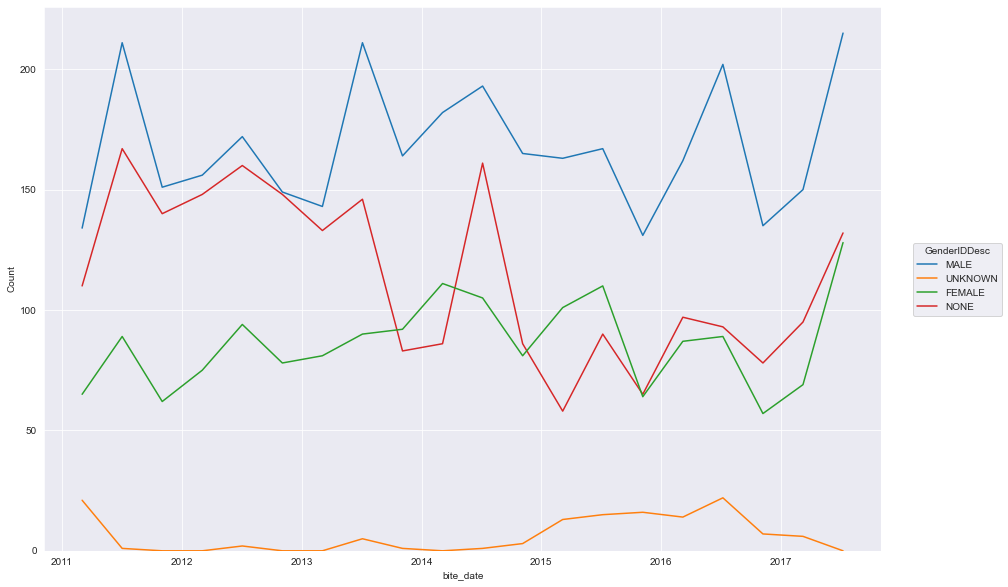

In [18]:
plt.figure(figsize=(15, 10))
g = sns.histplot(data=bites[bites.bite_year>2010], x='bite_date', hue='GenderIDDesc', multiple='layer', element='poly', 
            fill=False)
move_legend(g, new_loc='center right', bbox_to_anchor=(1.15, 0.5))

Again here there seems to be some questions about how information is reported.  It is unsurprising that male dogs tend to bite more in general than female (according to this data set).  However that is counter-intuitive to how Pit Bulls in particular behave - generally speaking Pit Bull females are far more aggressive than their male counterparts.  Since Pit Bulls make up the vast majority of breed dog bites it is surprising that males bite more frequently.  

Since there are more bites reporeted with no known gender than female bites until late 2013, it is important moving forward to ensure that gender data is collected, especially since it is so easy to obtain for dogs. 

My final question before taking a brief look at the rabies information to verify that there's nothing useful there is to check the distribution of bites by location in Louisville. 

In [19]:
victim = bites.victim_zip.value_counts()
victim = victim[victim<100]
drop_list = list(victim.index)
bites['victim_zip'].replace(to_replace=drop_list, value=np.nan, inplace=True)
bites['victim_zip'].replace(to_replace='NONE', value=np.nan, inplace=True)
bites.victim_zip.value_counts()

40272    371
40216    355
40291    355
40215    343
40214    336
40299    321
40229    297
40219    279
40218    247
40245    234
40212    222
40220    222
40241    219
40258    210
40211    208
40207    204
40223    192
40205    185
40213    169
40222    159
40206    153
40203    150
40228    132
40204    126
40217    122
40210    122
40208    116
Name: victim_zip, dtype: int64

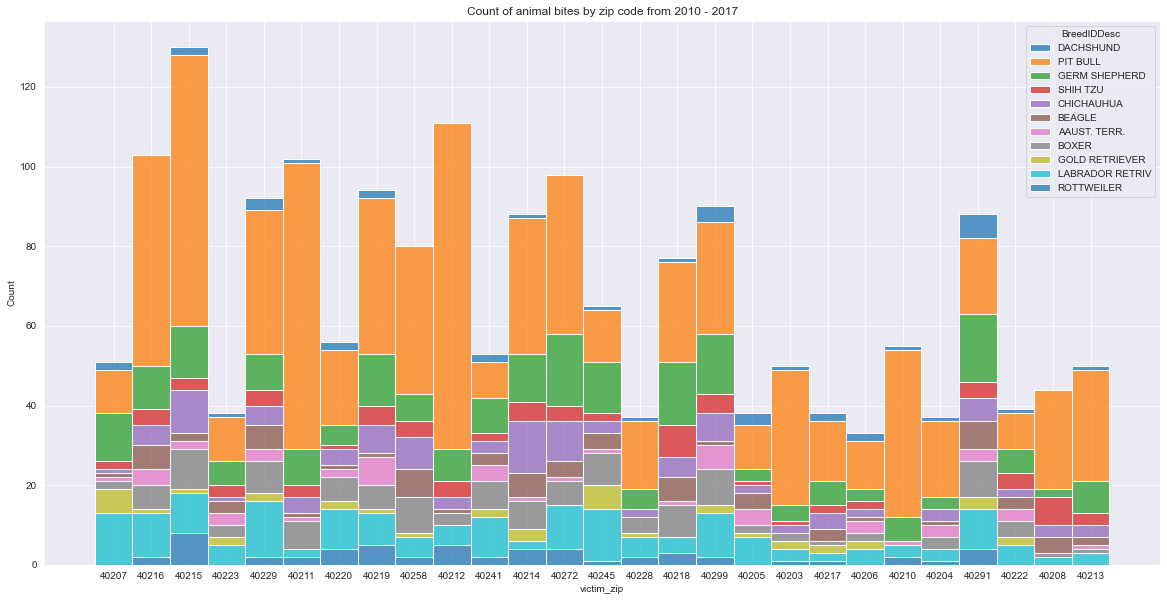

In [20]:
plt.figure(figsize=(20,10))
_ = bites[(bites.bite_year>=2011)&(bites.BreedIDDesc!='NONE')&(bites.BreedIDDesc!='OTHER')]
_ = _.dropna()
sns.histplot(data=_, x='victim_zip', stat='count', hue='BreedIDDesc', multiple='stack', palette='tab10')
plt.title('Count of animal bites by zip code from 2010 - 2017');

It appears that there are several zip codes with substantially more bites than others over the time period I'm looking at here.  

In particular there seems to be a large gap beterrn the 6 most common zip codes to be bitten in and the remainder of Louisville. 
In a later version of this project I'd like to draw up a heat map of the Louisville area and code these zip codes according to the frequency of bites.  Some research on the Louisville metro area and other traits of these zip codes could also shed light on what environmental factors might lead to more animal bites. 

It is also interesting that there *appears* to be some relationship between location and which breed is most likely to bite.  For instance, the two zip codes where Golden Retriever bites are the most frequent (40207, 40245) are also two zip codes where bites in general, and bites by pit bulls are significantly less frequent. 

Finally, I'm going to examine the 133 records that have an actual rabies disposition.  This consists of almost exclusively categorical information, the only numerical data present is the number of years since the last vaccination, and it's unclear if the vaccination records refer to animals or humans.

Additionally, much of this information is missing.  I want to see if there is any correlation between positive rabies outcomes and: Bite location, Bite year, Species of animal, and zip code. 

Correlations between these features could provide information or at least a direction in which a hyptohesis could be formed for more aggressive rabies testing, given than out of 9003 animal bite records only 133 were fully tested for rabies any conclusions drawn are statistically insignificant but could help to improve reporting practices moving forward. 

In [21]:
rabies['bite_date'] = pd.to_datetime(rabies['bite_date'])
rabies['bite_year'] = rabies['bite_date'].dt.year
#Dropping bites after 2017 - there are only two bites from 2018-2021
rabies=rabies[rabies.bite_year <= 2017]
rabies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 1115 to 8051
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          133 non-null    datetime64[ns]
 1   SpeciesIDDesc      133 non-null    object        
 2   BreedIDDesc        133 non-null    object        
 3   GenderIDDesc       65 non-null     object        
 4   color              67 non-null     object        
 5   vaccination_yrs    2 non-null      float64       
 6   vaccination_date   4 non-null      object        
 7   victim_zip         120 non-null    object        
 8   AdvIssuedYNDesc    28 non-null     object        
 9   WhereBittenIDDesc  118 non-null    object        
 10  quarantine_date    6 non-null      object        
 11  DispositionIDDesc  17 non-null     object        
 12  head_sent_date     129 non-null    object        
 13  release_date       0 non-null      object        
 14  Result

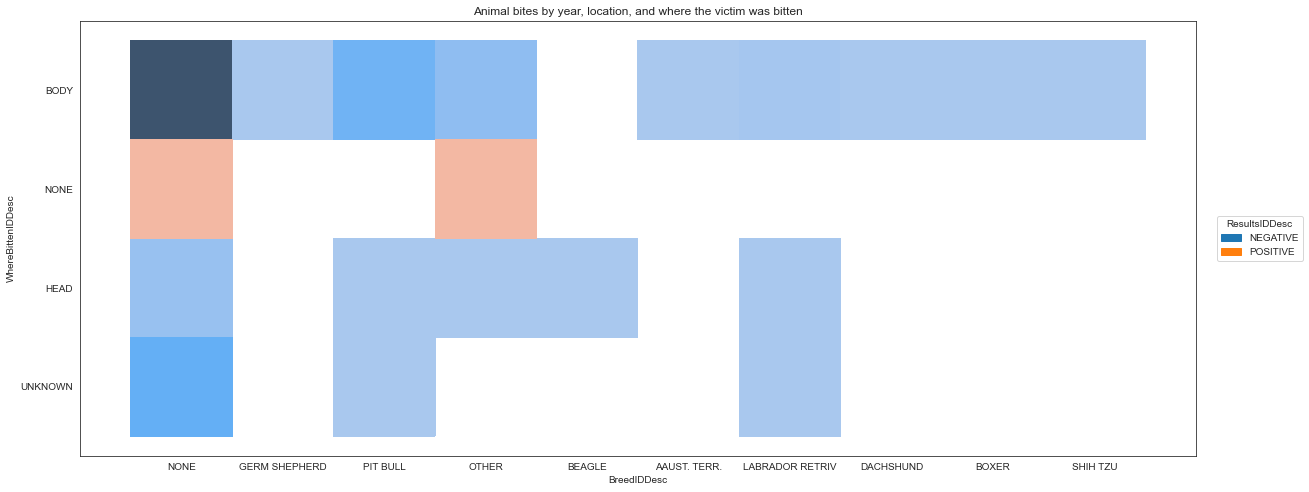

In [31]:
# Filling NA values prior to plotting
rabies.fillna('NONE', inplace=True)
plt.figure(figsize=(20,8))
sns.set_style('white')
g = sns.histplot(data=rabies, x='BreedIDDesc', y='WhereBittenIDDesc', hue='ResultsIDDesc', multiple='stack')
plt.title('Animal bites by year, location, and where the victim was bitten')
move_legend(g, new_loc='center right', bbox_to_anchor=(1.1, 0.5));

Well it appears that when bite victims were tested for rabies both times, officials didn't record where the bite was on the victim's body, or what breed bit the victim.  This could have been a result of both bites being from a different species than dogs if both were in the 'OTHER' category, however at least one of these rabid bits came from a dog. 

<ipython-input-40-ecdea59f3cc0>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=bites.victim_zip.values, rotation=45);


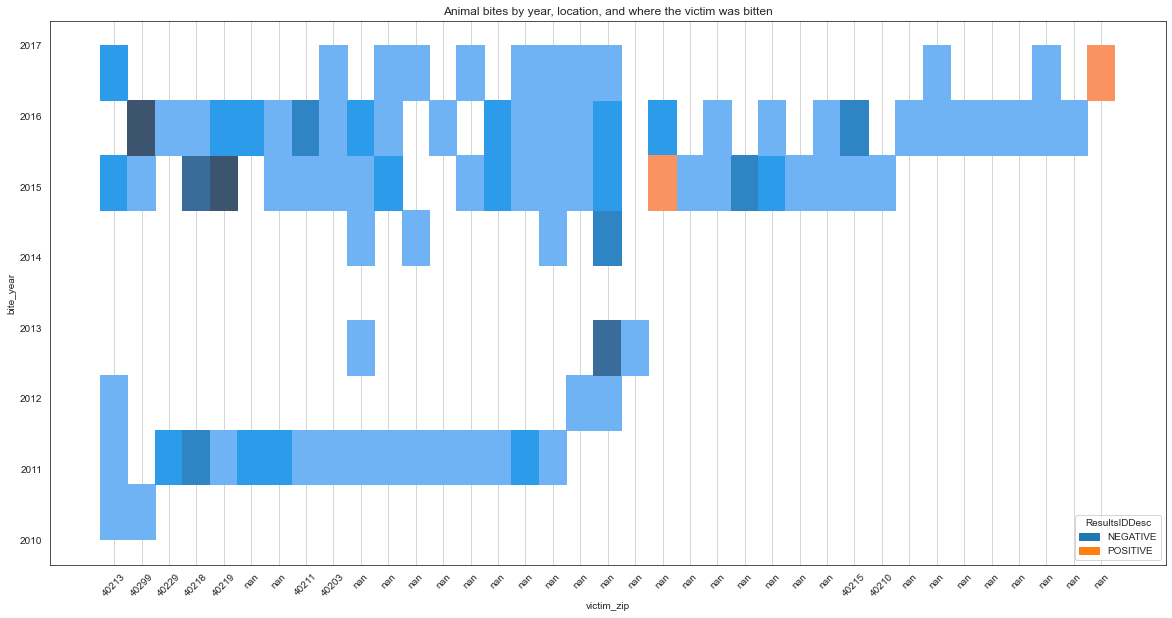

In [40]:
plt.figure(figsize=(20,10))
g = sns.histplot(data=rabies, x='victim_zip', y='bite_year', hue='ResultsIDDesc', multiple='stack')
plt.title('Animal bites by year, location, and where the victim was bitten')
move_legend(g, new_loc='lower right')
g.xaxis.grid(True)
g.set_xticklabels(labels=bites.victim_zip.values, rotation=45);

Several conclusions can be drawn from this graph.  

First, rabies testing was only *recorded* with animal bite data begining in 2010, the same year that we began to see a 100x increase in recordings of animal bites.  Clearly there was some push to standardize reporting around this in that year.  However there are clearly still some gaps that can be filled in - almost all of the bite recordings were missing any entry regarding rabies testing. 

Second, both instances of rabies occured in 2015 or later, which is interesting.  Generally rabies is not a disease that is on people's radar (particularly this year after COVID).  However, the data that we do have supports a hypothesis that more frequent testing **will** reveal a higher instance of rabies in animal populations.

Finally, there is a gap in rabies testing in 2013 adn 2014.  Unfortunately since there is not a high volumne of data it's difficult to say what would cause this.  This could just be the result of a lack of reporting or testing, particularly given that there was not a commensurate drop in actual animal bites, or change in the breed makeup of dogs who bit people in those years (slight increase in Chihuahua bites in 2014).   I would hypothesize that reporting behaviors caused a change in rabies reporting.  Further information on the "Advice Issued" column, and simply more records with that column filled out would potentially inform more on decisions to not test for rabies in those years. 

# Take-aways from this data:

1 - The overall trend in this data is again, difficult to tell.  There was a significant increase in reporting of animal bites from 2010 to 2011, with almost no records at all from previous years. While it appears that the trend since records were more throroughly kept is going down, there also is a massive drop off of recorded bites in 2018.  Inconsistent reporting of data makes it extremely difficult to draw a definite conclusion here. 

The issue of reporting also creates difficulty in drawing conclusions on rabid animal bites.  There were only two confirmed cases of rabies of 9003 recorded bites, and only 133 instances where rabies was fully investigated.  This could be because rabies is an uncommon disease, but without data on a veterinarian or doctors recommendation (Advice Issued  column is unclear what it means and also blank for 2/3 of the records).

Conclusions that can confidently be drawn from the data are this: Animal bites are more frequent in the summer across species, and less common in the winter.  This is likely because people are inside more often.

2 - There were two anomalies that seem to 'prove' the rule.  The first is that while all species bit less in winter months vs summer months, the frequency of cat bites dropped by about 1/3 in winter months, while dog bites were nearly halved.  The second anomaly is the 35% increase in dog bites in 2015 and 2016 over previous years.  This appears to be driven largely by an increase in German Shepherd bites in particular, while all breeds saw an increase in bite frequency.  

3 - There were some interesting correlations in the data that were found.  One in particular is that Pit Bulls, German Shepherds, Labrador Retrievers, and in some years Chihuahua's were the most frequent breeds to actually bite.  Second, it appears that there are some zip codes that are more closely associated with an increased number of animal bites, and those zip codes also see an increase in the number of pit bull bites in particular. 

4 - Unfortunately, this data *does* support the assumption that certain breeds are more likely to bite than others.  In particular Pit Bulls, German Shepherds, Labrador Retrievers, Chihuahua's, and Boxers are more likely to bite.  What is surprising is that Rottweilers were some of the breeds least likely to bite, and in several years Golden Retrievers bit people more frequently. 

5 - Follow-up hypotheses and recommendations:

-Establish consistent reporting practices around animal bites moving forward. Leaving simple factors around animal bites like Gender, Breed, Bite location, and Expert Recommendations empty is not useful.  I would like to be able to say definitively that a male or female dog is more likely to bite, however in most years there were more animals with the gender field left blank than 'Female'. Further, it is impossible to tell if the low instance of rabies testing is the result of expert recommendations or simply poor record keeping.  From 9003 records there were only 1543 rabies statuses recorded, and only 133 of those statuses were positive or negative - over 1400 of incidents were there was a record of rabies status the answer was 'unknown'.  Further, 395 animal heads were sent to be examined for rabies (the only way to conclusively diagnose rabies), but over half of those did not result in a conclusive rabies diagnosis.  

Finally, I can make two hypotheses that can be tested with the procurement of extra records.  While Pit Bulls, and other breeds are more frequent biters, I believe that this is a result of those breeds being more popular.  Pit Bulls and Labarador Retrievers are some of the most popular dog breeds and also have bitten people the most, without population data on the number of registered dogs it's difficult to draw conclusions on this.   However this data does seem to support airline and other companies' bans on Pit Bulls, which is already supported anecdotally.  

This also brings into question the adage "There are no bad pit bulls, there are bad owners'.  I hypothesize that if community dog training classes are made more available in zip codes with more frequent dog bites, the number of dog bites will significantly drop. 
